In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes
import seaborn as sns

In [2]:
df = pd.read_csv("Proj_NWP_Case1.csv")
df2 = pd.read_csv("Proj_Measurements_Case1.csv")
df.Date_Time=pd.to_datetime(df2.Date_Time)
df = df.set_index('Date_Time')
df2.Date_Time=pd.to_datetime(df2.Date_Time)
df2 = df2.set_index('Date_Time')

# NWP

In [8]:
df.head()

,Direction_10m,Speed_10m,Temperature_10m,Pressure_seaLevel,Air Density_10m,Direction_50m,Speed_50m,Temperature_50m,Air Density_50m,Direction_100m,Speed_100m,Temperature_100m,Air Density_100m,Direction_150m,Speed_150m,Temperature_150m,Air Density_150m
Date_Time,,,,,,,,,,,,,,,,,
2017-01-07 20:15:00,272,3.30,-5.30,995.0,1.295,270,2.60,-5.30,1.295,275,6.10,-5.30,1.295,276,9.70,-5.30,1.295
2017-01-07 20:30:00,272,3.47,-5.34,995.0,1.295,270,2.74,-5.34,1.295,275,6.35,-5.34,1.295,276,10.04,-5.34,1.295
2017-01-07 20:45:00,272,3.66,-5.46,995.0,1.296,270,2.91,-5.46,1.296,274,6.64,-5.46,1.296,276,10.42,-5.46,1.296
2017-01-07 21:00:00,271,3.86,-5.65,995.0,1.297,270,3.09,-5.65,1.297,274,6.94,-5.65,1.297,275,10.83,-5.65,1.297
2017-01-07 21:15:00,271,4.08,-5.89,995.0,1.298,269,3.29,-5.89,1.298,273,7.26,-5.89,1.298,274,11.25,-5.89,1.298


In [10]:
df2.head()

,Speed_10m,Direction_10m,Speed_30m,Direction_30m,Speed_65m,Direction_65m,Speed_70m,Direction_70m,Speed_80m,Direction_80m,Park Power [KW]
Date_Time,,,,,,,,,,,
2017-01-07 20:15:00,2.950,96.4,1.800,89.6,3.300,200.0,3.400,187.1,0.0,0.0,NaN
2017-01-07 20:30:00,2.967,91.3,3.033,77.1,2.467,194.5,2.833,178.6,0.0,0.0,NaN
2017-01-07 20:45:00,3.167,86.1,2.667,65.3,1.767,178.8,2.067,160.7,0.0,0.0,NaN
2017-01-07 21:00:00,3.300,85.5,2.800,58.5,1.600,176.0,1.750,157.5,0.0,0.0,NaN
2017-01-07 21:15:00,3.300,85.5,2.800,58.5,1.600,176.0,1.750,157.6,0.0,0.0,NaN


In [4]:
direction = ["Direction_10m","Direction_50m","Direction_100m","Direction_150m"]
speed = ["Speed_10m","Speed_50m","Speed_100m","Speed_150m"]
temperature = ["Temperature_10m","Temperature_50m","Temperature_100m","Temperature_150m"]
density = ["Air Density_10m","Air Density_50m","Air Density_100m","Air Density_150m"]
titles = ["10m","50m","100m","150m"]

## Data preperation

Examining data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181670 entries, 2017-01-07 20:15:00 to NaT
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Direction_10m      181670 non-null  int64  
 1   Speed_10m          181670 non-null  float64
 2   Temperature_10m    181670 non-null  float64
 3   Pressure_seaLevel  181670 non-null  float64
 4   Air Density_10m    181670 non-null  float64
 5   Direction_50m      181670 non-null  int64  
 6   Speed_50m          181670 non-null  float64
 7   Temperature_50m    181670 non-null  float64
 8   Air Density_50m    181670 non-null  float64
 9   Direction_100m     181670 non-null  int64  
 10  Speed_100m         181670 non-null  float64
 11  Temperature_100m   181670 non-null  float64
 12  Air Density_100m   181670 non-null  float64
 13  Direction_150m     181670 non-null  int64  
 14  Speed_150m         181670 non-null  float64
 15  Temperature_150m   181670 non-nul

Searching for NA values py columns

In [6]:
df.isna().sum()

Direction_10m        0
Speed_10m            0
Temperature_10m      0
Pressure_seaLevel    0
Air Density_10m      0
Direction_50m        0
Speed_50m            0
Temperature_50m      0
Air Density_50m      0
Direction_100m       0
Speed_100m           0
Temperature_100m     0
Air Density_100m     0
Direction_150m       0
Speed_150m           0
Temperature_150m     0
Air Density_150m     0
dtype: int64

## Data exploration

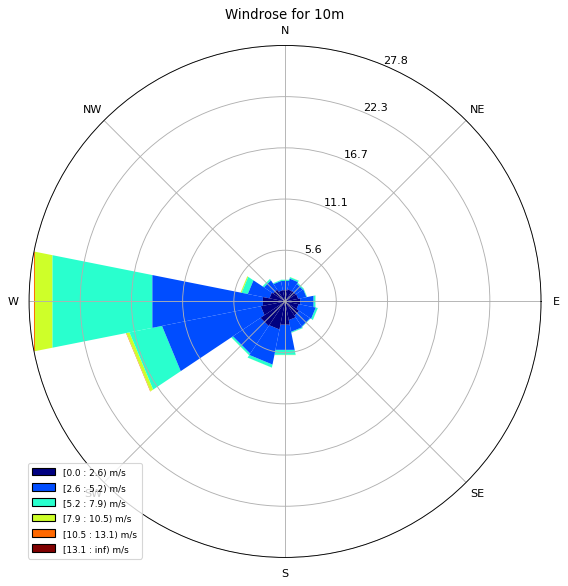

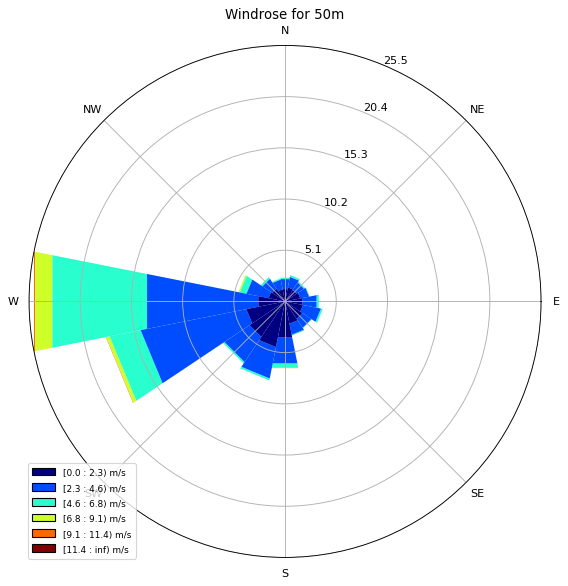

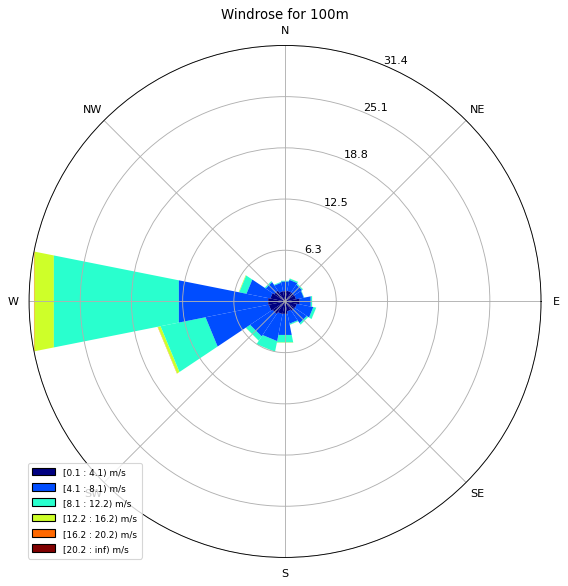

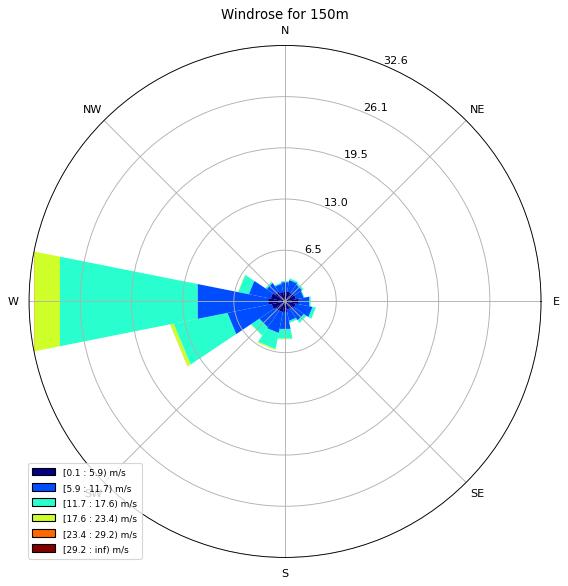

In [7]:
for i in range(len(speed)):
    ax = WindroseAxes.from_ax()
    ax.bar(df[direction[i]], df[speed[i]], normed=True, opening=1)
    ax.set_legend(units="m/s")
    ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'])
    ax.set_title("Windrose for " + titles[i])

## Wind time series

In [8]:
sns.set(rc={'figure.figsize':(15, 4)})

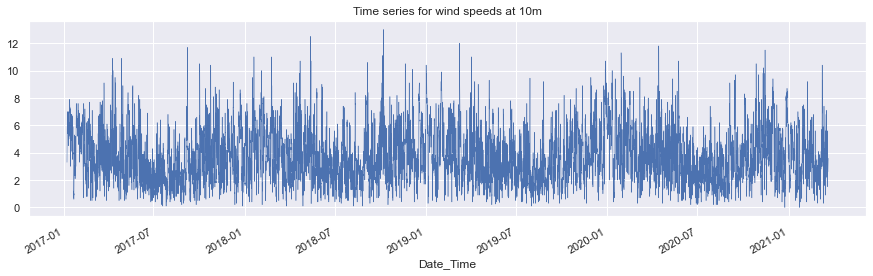

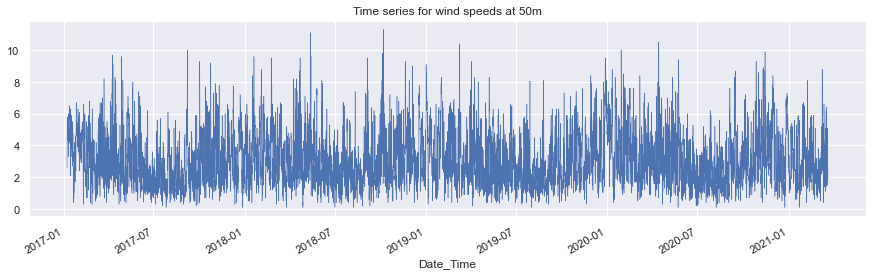

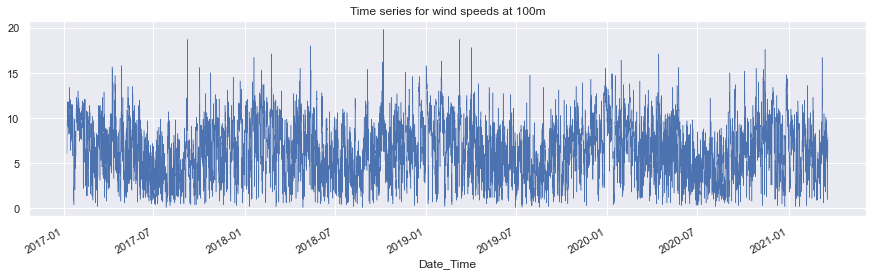

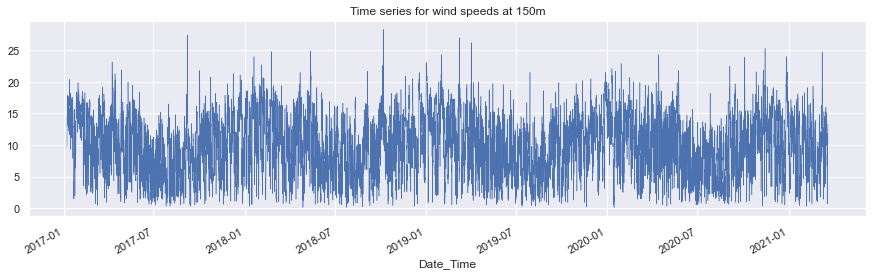

In [9]:
for i in range(len(speed)):
    df[speed[i]].plot(linewidth=0.5,title=("Time series for wind speeds at " +titles[i]));
    plt.show()

### Seasonality

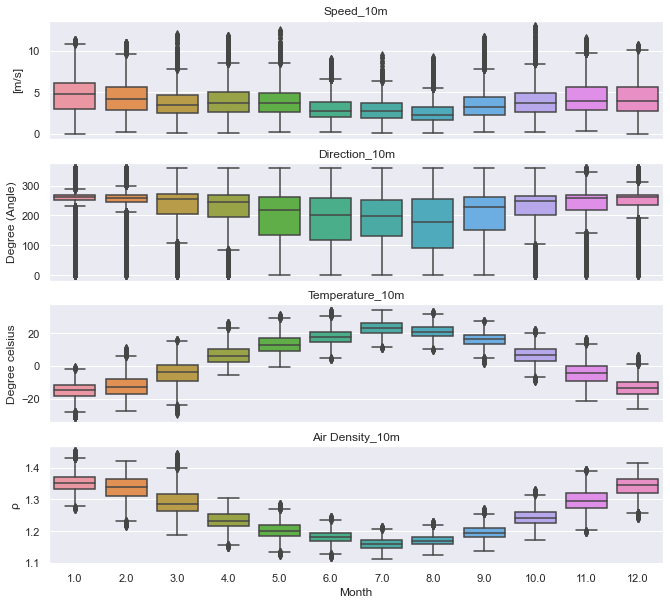

In [10]:
df['Month'] = df.index.month
ylabels=["[m/s]","Degrees","Degree celsius"]
fig, axes = plt.subplots(4, 1, figsize=(11, 10), sharex=True)
for name,label, ax in zip(['Speed_10m', 'Direction_10m', 'Temperature_10m',"Air Density_10m"],["[m/s]","Degree (Angle)","Degree celsius","ρ"], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel(label)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

In [11]:
df.head()

,Direction_10m,Speed_10m,Temperature_10m,Pressure_seaLevel,Air Density_10m,Direction_50m,Speed_50m,Temperature_50m,Air Density_50m,Direction_100m,Speed_100m,Temperature_100m,Air Density_100m,Direction_150m,Speed_150m,Temperature_150m,Air Density_150m,Month
Date_Time,,,,,,,,,,,,,,,,,,
2017-01-07 20:15:00,272,3.30,-5.30,995.0,1.295,270,2.60,-5.30,1.295,275,6.10,-5.30,1.295,276,9.70,-5.30,1.295,1.0
2017-01-07 20:30:00,272,3.47,-5.34,995.0,1.295,270,2.74,-5.34,1.295,275,6.35,-5.34,1.295,276,10.04,-5.34,1.295,1.0
2017-01-07 20:45:00,272,3.66,-5.46,995.0,1.296,270,2.91,-5.46,1.296,274,6.64,-5.46,1.296,276,10.42,-5.46,1.296,1.0
2017-01-07 21:00:00,271,3.86,-5.65,995.0,1.297,270,3.09,-5.65,1.297,274,6.94,-5.65,1.297,275,10.83,-5.65,1.297,1.0
2017-01-07 21:15:00,271,4.08,-5.89,995.0,1.298,269,3.29,-5.89,1.298,273,7.26,-5.89,1.298,274,11.25,-5.89,1.298,1.0


# Measurements

In [12]:
df2.head()

,Speed_10m,Direction_10m,Speed_30m,Direction_30m,Speed_65m,Direction_65m,Speed_70m,Direction_70m,Speed_80m,Direction_80m,Park Power [KW]
Date_Time,,,,,,,,,,,
2017-01-07 20:15:00,2.950,96.4,1.800,89.6,3.300,200.0,3.400,187.1,0.0,0.0,NaN
2017-01-07 20:30:00,2.967,91.3,3.033,77.1,2.467,194.5,2.833,178.6,0.0,0.0,NaN
2017-01-07 20:45:00,3.167,86.1,2.667,65.3,1.767,178.8,2.067,160.7,0.0,0.0,NaN
2017-01-07 21:00:00,3.300,85.5,2.800,58.5,1.600,176.0,1.750,157.5,0.0,0.0,NaN
2017-01-07 21:15:00,3.300,85.5,2.800,58.5,1.600,176.0,1.750,157.6,0.0,0.0,NaN


In [25]:
df2 = df2.rename(columns={'Park Power [KW]': 'Park_Power_KW'})

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147205 entries, 2017-01-07 20:15:00 to 2021-03-21 05:15:00
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Speed_10m      146730 non-null  float64
 1   Direction_10m  146730 non-null  float64
 2   Speed_30m      146730 non-null  float64
 3   Direction_30m  146730 non-null  float64
 4   Speed_65m      146730 non-null  float64
 5   Direction_65m  146730 non-null  float64
 6   Speed_70m      146730 non-null  float64
 7   Direction_70m  146730 non-null  float64
 8   Speed_80m      39772 non-null   float64
 9   Direction_80m  39772 non-null   float64
 10  Park_Power_KW  142392 non-null  float64
 11  Month          147205 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 14.6 MB


In [11]:
len(df2)

147205

In [27]:
df2.isna().sum()

Speed_10m           475
Direction_10m       475
Speed_30m           475
Direction_30m       475
Speed_65m           475
Direction_65m       475
Speed_70m           475
Direction_70m       475
Speed_80m        107433
Direction_80m    107433
Park_Power_KW      4813
Month                 0
dtype: int64

ValueError: Could not interpret input 'Park_Power_KW'

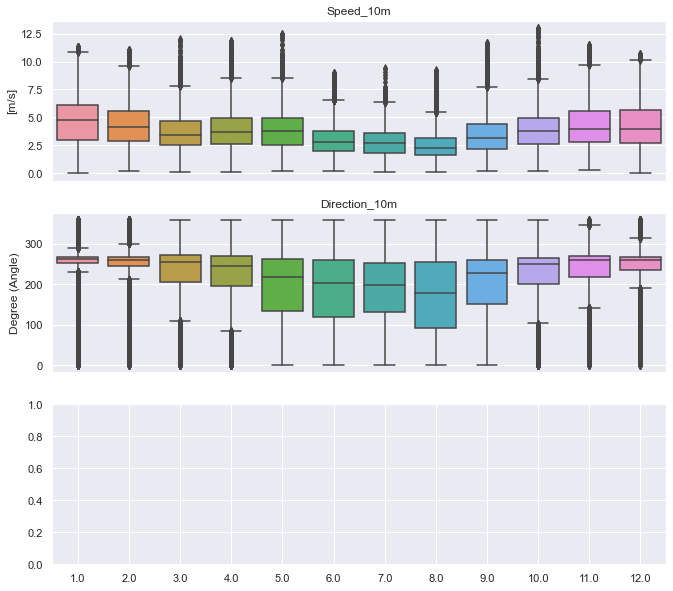

In [30]:
df2['Month'] = df2.index.month
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name,label, ax in zip(['Speed_10m', 'Direction_10m','Park_Power_KW'],["[m/s]","Degree (Angle)", "[KW]"], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel(label)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

## Further look into NWP

<AxesSubplot:>

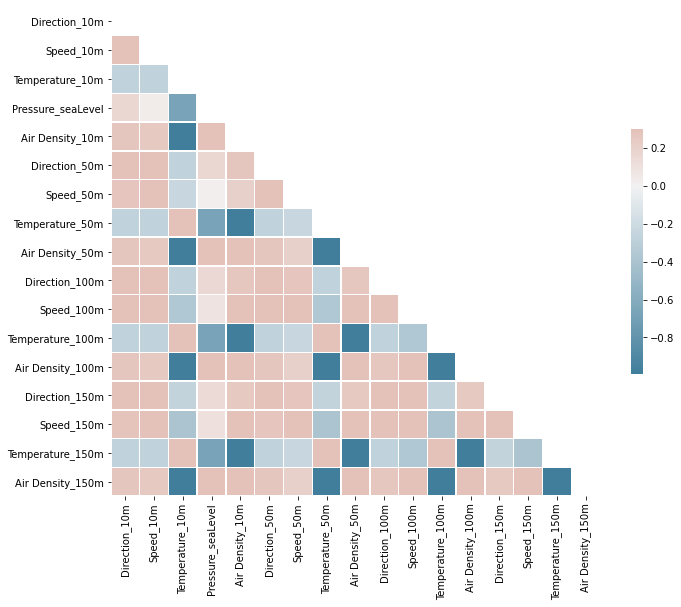

In [13]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})